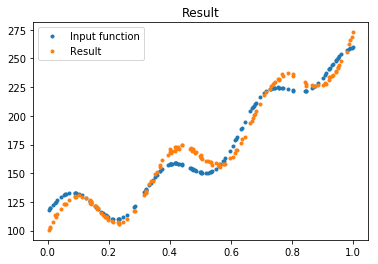

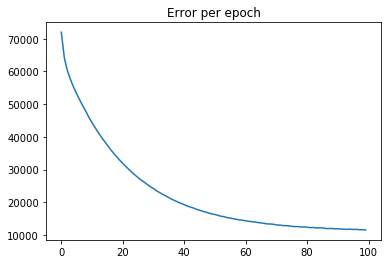

In [118]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import random
from sklearn.model_selection import train_test_split

x_data = np.linspace(0, 1, 1000)
y_data = 20 * np.sin(2 * np.pi * 3 * x_data) + 100 * np.exp(x_data)
t = y_data + np.random.randn(1000)

t = t.reshape(t.shape[0], -1)

n_features = 10
mini_batch_size = 128

# Split data set
x, x_test, y, y_test = train_test_split(x_data, t, test_size=0.2, train_size=0.8)
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.25, train_size=0.75)

x_train, x_test, y_train, y_test = train_test_split(x_data, t, test_size=0.3)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5)

training_data = list(zip(x_train, y_train))
validation_data = list(zip(x_val, y_val))
test_data = list(zip(x_test, y_test))  

def computing_Fert(x, n):
    F = np.ones((x.size, n))
    for i in range(2, n-1):
        F[:, i] = x ** i
    F[:, n-1] = np.sin(20 * x)
    return F

Fert = tf.placeholder(tf.float32)
W = tf.Variable(tf.random_normal([n_features ,1]), tf.float32)

Y = tf.placeholder(tf.float32)
y_result = tf.matmul(Fert, W)

loss = tf.pow(tf.norm(Y - y_result), 2)

opt = tf.train.GradientDescentOptimizer(0.001).minimize(loss)

mini_batches_x = []
mini_batches_y = []
for ind in range(0, len(training_data), mini_batch_size):
    mini_batches_x.append(x_train[ind:ind + mini_batch_size])
    mini_batches_y.append(y_train[ind:ind + mini_batch_size])

init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

list_of_errors = []

for i in range(100):
    list_of_batches = list(zip(mini_batches_x, mini_batches_y))
    random.shuffle(list_of_batches)
    for mini_batch_x, mini_batch_y in list_of_batches:
        sess.run(opt, feed_dict={Fert: computing_Fert(mini_batch_x, n_features), Y: mini_batch_y})
    list_of_errors.append(sess.run(loss, feed_dict={Fert: computing_Fert(x_val, n_features), Y: y_val}))

plt.figure()
plt.title("Result")
plt.plot(x_test, np.dot(computing_Fert(x_test, n_features), sess.run(W)), '.', label = 'Input function')
plt.plot(x_test, y_test, '.', label = 'Result')
plt.legend()
plt.show()

plt.figure()
plt.title("Error per epoch")
plt.plot(list_of_errors)
plt.show()